#  Monthly Payment and Loan Amount Associated Factors
## by Olaoluwa Ebiekuraju

## Investigation Overview

In this investigation, I wanted to look at the factors associated with the prosper rating, loan amount and the monthly payment. The main focus were the loan details like; the quarter of the year the loan was borrowed, loan length and also the borrowers information like; owning a home or not and the anual income. 

## Dataset Overview

This data set contained 113,937 loans with 81 variables on each loan. Only few of the variables were required for this analysis.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df_loan = pd.read_csv('prosper_loan.csv')

In [3]:
# Changing the income range for those not employed to $0
df_loan['IncomeRange'].replace('Not employed','$0', inplace=True)

# Extracting only the quarters 
df_loan['Quarter'] = df_loan['LoanOriginationQuarter'].str.extract(r'(Q\d)')

# convert  Quarter, and Income Range into ordered categorical types
cat_var = {'Quarter': ['Q1','Q2','Q3','Q4'],
           'IncomeRange':['Not displayed','$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+'] }

for var in cat_var:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,categories = cat_var[var])
    df_loan[var] = df_loan[var].astype(ordered_var)

## Distribution of  Monthly Loan Payment

The monthly payment in the dataset is positively skewed, with values ranging from \$0 at the lowest to about \$2560 at the highest. To eliminate outliers, it was plotted between the range of \$0 and \$600.

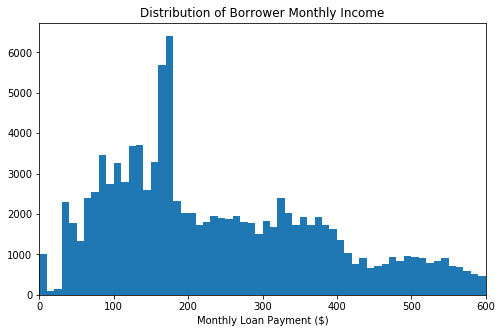

In [4]:
# plotting the histogram for monthly income and eliminating outliers
plt.figure(figsize=[8,5])
bins= np.arange(min(df_loan['MonthlyLoanPayment']),max(df_loan['MonthlyLoanPayment'])+10,10)
plt.hist(data=df_loan, x='MonthlyLoanPayment', bins=bins)
plt.xlabel('Monthly Loan Payment ($)');
plt.title('Distribution of Borrower Monthly Income')
plt.xlim((0,600)); 
plt.show()

## Distribution of Loan Original Amount

The loan original amount is also positively skewed, ranging from \$1000 to \$35000. The conspicuous spikes in the frequencies of 2k, 3k, 4k, 5k, 10k, and 15k. To eliminate outliers, it was plotted between the range of \$800 and \$25400 with each bar set at \$200.

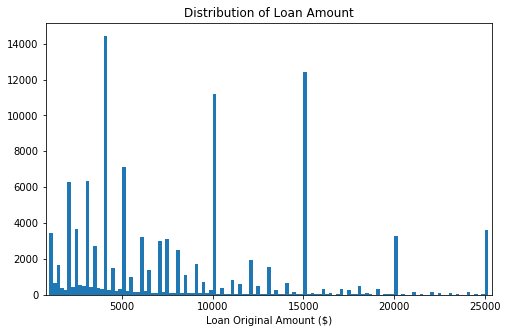

In [5]:
# plotting the histogram for Loan Original Amount and eliminating outliers
plt.figure(figsize=[8,5])
bins= np.arange(min(df_loan['LoanOriginalAmount']),max(df_loan['LoanOriginalAmount'])+200,200)
plt.hist(data=df_loan, x='LoanOriginalAmount', bins=bins)
plt.xlabel('Loan Original Amount ($)');
plt.title('Distribution of Loan Amount')
plt.xlim((800,25400))
plt.show()

## Monthly Payment Vs. Loan Amount

The relationship is linear but splited into three major divisions which might be the influence of another very correlated variable.

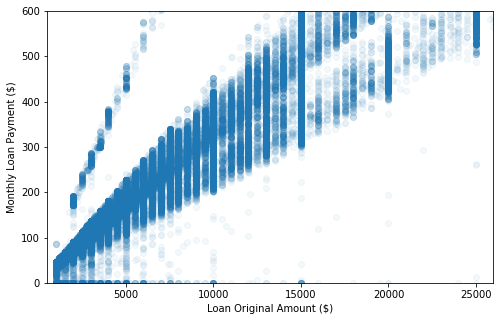

In [6]:
# Scatter Plot between Monthly Payment and Loan Amount
plt.figure(figsize = [8, 5])
plt.scatter(data = df_loan, y = 'MonthlyLoanPayment', x = 'LoanOriginalAmount', alpha = 1/20);
plt.ylabel('Monthly Loan Payment ($)');
plt.xlabel('Loan Original Amount ($)');
plt.ylim((0,600));
plt.xlim((500,26000));

## Monthly Payment Vs. Loan Amount by Loan Length

There is an interaction effect visible between Monthly Payment, Loan Amount and Loan Length. Loan Length is the number of months the loan should last. Using color encoding to delineate the loan length in the scatter plot, it showed that monthly payment icreases with loan amount and decreases with the loan length.

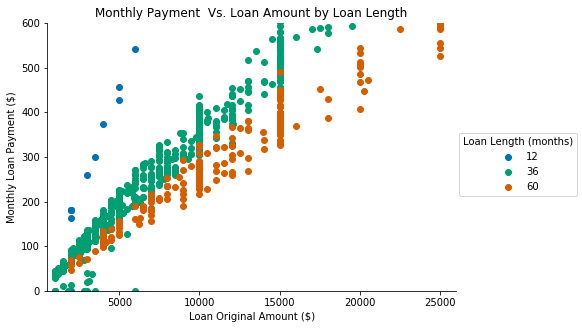

In [7]:
# To avoid overploting, the 500 sampled data is used to plot the same scatter plot, but now with a third variable.
# since loan length(Term) is the only variable with 3 categories, there is high possibility each of it is related to the montly
# payment against scatter plot
df_sample = df_loan.sample(1000)

g = sb.FacetGrid(data = df_sample, hue = 'Term', size = 4.5, palette = 'colorblind', aspect=1.5)
g.map(plt.scatter, 'LoanOriginalAmount','MonthlyLoanPayment')
plt.xlabel('Loan Original Amount ($)')
plt.ylabel('Monthly Loan Payment ($)')
plt.title('Monthly Payment  Vs. Loan Amount by Loan Length')
plt.ylim((0,600));
plt.xlim((500,26000));
g.add_legend(title='Loan Length (months)');

## Loan Amount Vs Quarter and Income Range

There is an interaction effect visible between Loan Amount and Quarter of the year the loan was lended out, and also Loan Amount and Income Range of the borrower. The average loan amount was higher in the first and last quarters of the year. It increases with increase in the annual income. 

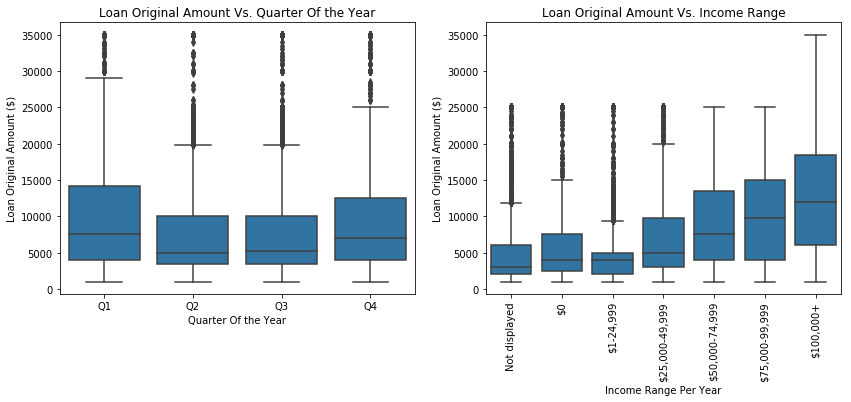

In [8]:
plt.figure(figsize=[14,5])

plt.subplot(1,2,1)
base_color = sb.color_palette()[0]
sb.boxplot(data=df_loan, x='Quarter', y='LoanOriginalAmount',color=base_color);
plt.title('Loan Original Amount Vs. Quarter Of the Year')
plt.xlabel('Quarter Of the Year')
plt.ylabel('Loan Original Amount ($)');

plt.subplot(1,2,2)
sb.boxplot(data=df_loan, x='IncomeRange', y='LoanOriginalAmount',color=base_color);
plt.title('Loan Original Amount Vs. Income Range')
plt.xlabel('Income Range Per Year')
plt.ylabel('Loan Original Amount ($)');
plt.xticks(rotation=90);

## Loan Amount Vs Quarter by Income Range

Those who earn 50k and above per annum borrow more money at the first and last quarters as compared to those earning less.

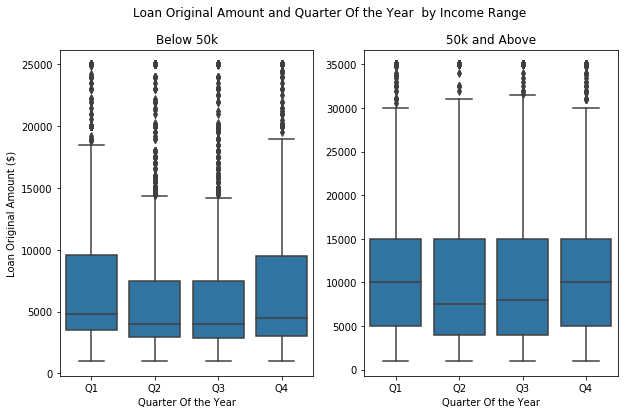

In [9]:
# create dataframes based on income range 
#below 50K
df_blw_50k = df_loan.query('IncomeRange == "$0" or IncomeRange=="$1-24,999" or IncomeRange=="$25,000-49,999"')
# 50k and above
df_50k_abv = df_loan.query('IncomeRange == "$50,000-74,999" or IncomeRange=="$$75,000-99,999" or IncomeRange=="$100,000+"')

# plotting boxplot based on Income Range 
fig, ax = plt.subplots(ncols = 2, figsize = [10,6])
sb.boxplot(data = df_blw_50k, y = 'LoanOriginalAmount', x = 'Quarter', ax = ax[0],color = base_color)
ax[0].set_xlabel("Quarter Of the Year")
ax[0].set_ylabel("Loan Original Amount ($)")
ax[0].set_title('Below 50k')
sb.boxplot(data = df_50k_abv, y = 'LoanOriginalAmount', x = 'Quarter', ax = ax[1], color = base_color)
ax[1].set_xlabel("Quarter Of the Year")
ax[1].set_title('50k and Above')
ax[1].set_ylabel("")
fig.suptitle('Loan Original Amount and Quarter Of the Year  by Income Range')
plt.show()

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

>In the classroom workspace, the generated HTML slideshow will be placed in the home folder.

>In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. 